# Assignment3 Week3

# Explenaition Linear Regression: 

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an dependent variable Y, and the other is considered to be a independent variable X. Y = a + bX

# Pre-processing steps & Head resulting dataframe 


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('Data_mashable.csv')
df.head(5)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


# Investigate variables 

In [4]:
df.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


In [19]:
df_subset = df[["is_weekend", "num_imgs", "n_tokens_content","global_subjectivity","title_subjectivity"]]
df_subset

,is_weekend,num_imgs,n_tokens_content,global_subjectivity,title_subjectivity
0,0,12,821,0.439379,0.666667
1,0,6,489,0.300454,0.000000
2,0,0,131,0.575486,0.000000
3,0,2,556,0.327220,0.000000
4,0,18,880,0.507709,0.000000
...,...,...,...,...,...
24994,0,9,342,0.448753,0.642857
24995,0,1,243,0.418081,0.000000
24996,1,4,1334,0.486041,0.288889
24997,0,1,263,0.627143,0.000000


In [20]:
y = df['shares_log'] #Y-variable
X = df_subset #X variables that helping predicting Y
X.index = df['url'] 
X.head() 

,is_weekend,num_imgs,n_tokens_content,global_subjectivity,title_subjectivity
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0,12,821,0.439379,0.666667
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,0,6,489,0.300454,0.000000
http://mashable.com/2013/02/01/hello-kitty-rocket/,0,0,131,0.575486,0.000000
http://mashable.com/2014/02/06/add-us-on-snapchat/,0,2,556,0.327220,0.000000
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0,18,880,0.507709,0.000000


# Splitting the dataset into a training and test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, 30/70
X_train.head() # this is the train set

,is_weekend,num_imgs,n_tokens_content,global_subjectivity,title_subjectivity
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,1,0,141,0.451711,0.500000
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,0,9,392,0.476976,0.100000
http://mashable.com/2013/03/08/facebook-acquires-storylane/,0,1,622,0.488495,0.000000
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,0,23,251,0.545746,0.454545
http://mashable.com/2013/08/28/chef-knife-moves-video/,0,13,940,0.507042,0.750000


# Train model

In [22]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [23]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.127856,is_weekend
0.003892,num_imgs
-0.000015,n_tokens_content
0.294769,global_subjectivity
0.037169,title_subjectivity


The highest coefficient is the global subjectivity, this has the highest correlation on the target. 



In [24]:
y_pred = lm.predict(X_test) #generate the predictions
resid = y_pred - y_test #get the residuals by subtracting the prediction from the actual shares

Investigating the residuals

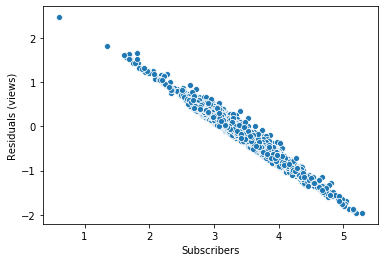

In [25]:
sns.scatterplot(x=y_test,y=resid,data=df)
plt.xlabel('Subscribers')
plt.ylabel('Residuals (views)')
plt.show()

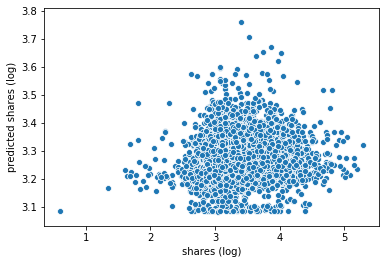

In [26]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('shares (log)')
plt.ylabel('predicted shares (log)')
plt.show()

In [28]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.025697296641941647

Low accuracy 

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4007806707933104

The RMSE is 0.40. This number of 0.40 is off the predicting. 

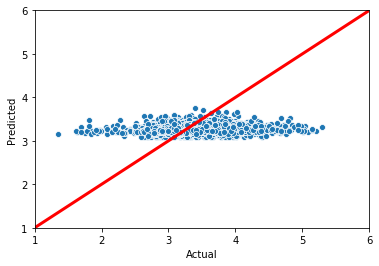

In [33]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim([1,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='red', lw=3) #Plot a diagonal length
plt.show()

The model doenst work well. Red line is not in line with the predictions. 